Remmeber to change runtime to GPU, enjoy using FinalFlow

An example of MNIST trained with conv layers using CUDA

---



In [10]:
!pip install FinalFlow

In [3]:
import cupy as cp

In [4]:

from FinalFlow.FinalFlowConv import *


In [5]:
train_path = 'sample_data/mnist_train_small.csv'

In [6]:
#load the csv
img_data = Image(path = train_path,test_frac = 0.5,val_frac = 0.45,image_size=(28,28), colour = 'gray')

In [7]:
#get trainning data
train_data = img_data.train_data
train_labels = img_data.train_labels

test_data = img_data.train_data
test_labels = img_data.train_labels

label : [9]


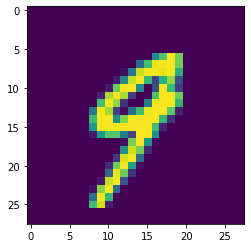

In [8]:
#show some labels and images

id = 454

print('label :' ,test_labels[id,:])
img =  train2img(train_data[id,:,:,:]).reshape((28,28))
plt.imshow(img)

In [9]:
#define the model
Layer1 = Conv(X = np.array(train_data),in_channels = 1, out_channels = 2, kernel_size=8, stride=1, padding= 2  , Activation_fn = 'relu')
Layer2 = MaxPool(Layer1.output(),kernel_size=3, stride=1, padding=0)
Layer3 = Flatten(Layer2.output())
Layer4 = Linear(Input_Matrix = Layer3.output().T,Output_Dimension = 500,Activation_fn = 'relu')
Layer5 = Linear(Input_Matrix = Layer4.output(),Output_Dimension = 10,Activation_fn = 'softmax')
my_Model = Model([Layer1,Layer2,Layer3,Layer4,Layer5])
my_Loss = my_Model.Loss(np.array(train_labels), Layer5.output()).CrossEntropy()


 Loss : 0.10876206220396395
accuracy  :  0.09509509509509509

 Loss : 2.276736022102496
accuracy  :  0.0

 Loss : 2.1848815502811436
accuracy  :  0.15615615615615616

 Loss : 2.1446171645577468
accuracy  :  0.2502502502502503

 Loss : 2.0831652330332835
accuracy  :  0.3113113113113113

 Loss : 2.030754815199078
accuracy  :  0.3833833833833834

 Loss : 1.9889141978768268
accuracy  :  0.42242242242242245

 Loss : 1.9479096822560673
accuracy  :  0.4444444444444444

 Loss : 1.9073656816313647
accuracy  :  0.4824824824824825

 Loss : 1.8695045304217752
accuracy  :  0.5255255255255256

 Loss : 1.8332103809883336
accuracy  :  0.5495495495495496

 Loss : 1.7978198008805664
accuracy  :  0.5805805805805806

 Loss : 1.7640377623918366
accuracy  :  0.5985985985985987

 Loss : 1.731622671984986
accuracy  :  0.6256256256256256

 Loss : 1.7001983536068475
accuracy  :  0.6366366366366366

 Loss : 1.6699709198498829
accuracy  :  0.6436436436436437

 Loss : 1.6409485647871391
accuracy  :  0.65465465465

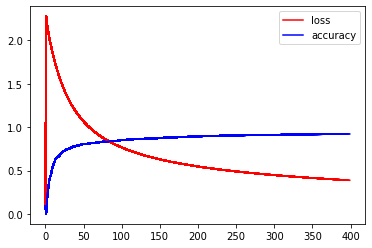

In [12]:
#parameters
learning_rate = 0.065
training_epochs = 400
epsilon = 0.01
#train and visualize
opt = my_Model.Optimization(training_epochs, my_Loss, learning_rate, epsilon).GradientDescent()

In [13]:
#inference the model

y_hat = my_Model.inference(Test_Inputs = cp.array(test_data))

y_hat = np.argmax(y_hat, axis = 0)

label : 4


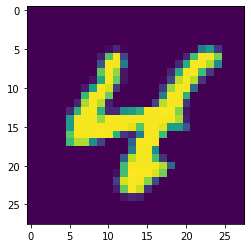

In [15]:
#see what the model has learned

test_id = 30

print('label :' ,y_hat[test_id])
img =  train2img(train_data[test_id,:,:,:]).reshape((28,28))
plt.imshow(img)

In [16]:
#save the model

Utils = Model_Utils()
Utils.save(my_Model,'MNIST-Conv')


In [17]:
#load the model

loaded_Model = Utils.load('MNIST-Conv')